# Tratamento de dados

In [8]:
#Importando bibiliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno #msno.matrix(df)#como usar
import seaborn as sns


In [9]:
# Lendo os DF's
df = pd.read_csv('Dados Brutos\BRA2023_jogadores.csv')
df1 = pd.read_excel('Dados Brutos\passes.xlsx')
df2 = pd.read_excel('Dados Brutos\chutes.xlsx')
df3 = pd.read_excel('Dados Brutos/acoes_defensivas.xlsx')

df = df.drop(columns = 'Unnamed: 36')


In [10]:
# Copiando as colunas complementares do arquivo passes

colunas_para_copiar = ['TCmp', 'TAtt', 'TCmp%', 'TDistTot', 'TDistPrg', 'CCmp', 
                       'CAtt','CCmp%', 'MCmp', 'MAtt', 'MCmp%', 'LCmp', 'LAtt', 'LCmp%']
for coluna in colunas_para_copiar:
    df[coluna] = df1[coluna]

In [11]:
# Copiando as colunas complementares do arquivo chutes
colunas_para_copiar = ['Gols', 'TC', 'CaG', 'SoT%', 'Sh/90' ,
                       'SoT/90' ,'G/Sh' ,'G/SoT', 'Dist' ,'FK' ,'PB', 'PT']
for coluna in colunas_para_copiar:
    df[coluna] = df2[coluna]

In [12]:
# Copiando as colunas interessantes do arquivo acoes_defensivas
colunas_para_copiar = ['BotesDefensivos', 'AssumiuPosse', 'Confrontos_1ter','Confrontos_2ter', 'Confrontos_3ter', 
                       'Desarme', '%DesarmesCertos','DesarmeErrado', 'ChutesBloqueados', 'PassesBloqueados', 'Cortes',
                       'Interceptacoes', 'Def', 'Erros']
for coluna in colunas_para_copiar:
    df[coluna] = df3[coluna]

In [13]:
# Dropando as linhas onde os minutos jogados pelo jogador for 0, trabalhar apenas com jogadores que foram ativos no campeonato

df = df[df['MP'] != 0]
df = df[df['Min.'] != 0]

In [14]:
# Renomeando as colunas para ficar mais compreensível

nomes_colunas = [
    'ID', 'Jogador', 'Nação', 'Pos', 'Equipe', 'Idade', 'Nascimento', 'Jogos', 'Inícios', 'Minutos',
    '90s', 'Gols', 'Assist', 'G+A', 'Gnormal', 'PC', 'PB', 'CartaoA', 'CartaoV', 'xG', 'xGnormal',
    'xG+A', 'xGnormal+xG+A', 'PrgCarregadas', 'PrgPasses', 'PrgPassesPrgRecebidos', 'Gols90',
    'Assis.90', 'G+A90', 'G-PB90', 'G+A-PB90', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1',
    'PassesTotaisConcluidos', 'PassesTotaisTentados', '%ConclusãoDePasses', 'DistTotalPasses',
    'DistTotalProgressivos', 'PassesConcluidosCurto', 'PassesTentadosCurto', '%PassesConclusaoCurto',
    'PassesConcluidosMedio', 'PassesTentadosMedio', '%PassesConclusaoMedio', 'PassesConcluidosLongo',
    'PassesTentadosLongo', '%PassesConclusaoLongo', 'TotalChutes', 'ChutesAGol', '%ChutesNoGol',
    'TotalChutes/90', 'TotalAcertos/90', 'Gols/Chutes', 'Gols/ChuteaGol', 'DistanciaChute',
    'CobrancaFalta','BotesDefensivos', 'AssumiuPosse', 'Confrontos_1ter',
    'Confrontos_2ter', 'Confrontos_3ter', 'Desarme', '%DesarmesCertos', 'DesarmeErrado',
    'ChutesBloqueados', 'PassesBloqueados', 'Cortes', 'Interceptacoes', 'Def', 'Erros'
]

df.columns = nomes_colunas

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,ID,Jogador,Nação,Pos,Equipe,Idade,Nascimento,Jogos,Inícios,Minutos,90s,Gols,Assist,G+A,Gnormal,PC,PB,CartaoA,CartaoV,xG,xGnormal,xG+A,xGnormal+xG+A,PrgCarregadas,PrgPasses,PrgPassesPrgRecebidos,Gols90,Assis.90,G+A90,G-PB90,G+A-PB90,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,PassesTotaisConcluidos,PassesTotaisTentados,%ConclusãoDePasses,DistTotalPasses,DistTotalProgressivos,PassesConcluidosCurto,PassesTentadosCurto,%PassesConclusaoCurto,PassesConcluidosMedio,PassesTentadosMedio,%PassesConclusaoMedio,PassesConcluidosLongo,PassesTentadosLongo,%PassesConclusaoLongo,TotalChutes,ChutesAGol,%ChutesNoGol,TotalChutes/90,TotalAcertos/90,Gols/Chutes,Gols/ChuteaGol,DistanciaChute,CobrancaFalta,BotesDefensivos,AssumiuPosse,Confrontos_1ter,Confrontos_2ter,Confrontos_3ter,Desarme,%DesarmesCertos,DesarmeErrado,ChutesBloqueados,PassesBloqueados,Cortes,Interceptacoes,Def,Erros
0,1,Nicolás Acevedo,uy URU,LT,Bahia,23.0,1999.0,31,21,"1,970",21.9,0,0,0,0,0,0,7,1,0.9,0.9,1.2,2.1,29.0,112.0,36.0,0.00,0.00,0.00,0.00,0.00,0.04,0.05,0.10,0.04,0.10,1029.0,1237.0,83.2,17288.0,5431.0,492.0,543.0,90.6,424.0,499.0,85.0,82.0,118.0,69.5,23,4,17.4,1.05,0.18,0.00,0.00,25.3,0.0,73.0,46,24.0,43.0,6.0,40.0,47.1,45.0,1.0,30.0,26,99.0,22.0,1.0
1,2,Luiz Adriano,br BRA,AT,Internacional,35.0,1987.0,29,17,"1,330",14.8,3,1,4,3,0,0,1,1,2.6,2.6,1.3,3.9,3.0,23.0,49.0,0.20,0.07,0.27,0.20,0.27,0.18,0.09,0.27,0.18,0.27,208.0,253.0,82.2,2628.0,429.0,128.0,147.0,87.1,58.0,66.0,87.9,6.0,8.0,75.0,24,11,45.8,1.62,0.74,0.13,0.27,14.4,0.0,12.0,7,0.0,6.0,6.0,2.0,28.6,5.0,2.0,7.0,9,21.0,18.0,0.0
2,3,Adriel,br BRA,G,Grêmio,22.0,2001.0,2,2,180,2.0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.0,63.0,44.4,1101.0,947.0,3.0,3.0,100.0,10.0,10.0,100.0,15.0,50.0,30.0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0,0.0
3,4,Adryelson,br BRA,ZG,Botafogo (RJ),24.0,1998.0,35,35,"2,996",33.3,1,1,2,1,0,0,6,1,1.1,1.1,0.3,1.4,2.0,56.0,3.0,0.03,0.03,0.06,0.03,0.06,0.03,0.01,0.04,0.03,0.04,1303.0,1523.0,85.6,25681.0,9401.0,416.0,468.0,88.9,728.0,819.0,88.9,148.0,211.0,70.1,12,5,41.7,0.36,0.15,0.08,0.20,9.9,0.0,34.0,20,23.0,10.0,1.0,17.0,65.4,9.0,30.0,13.0,61,95.0,202.0,2.0
4,5,Adson,br BRA,"AT,LT",Corinthians,22.0,2000.0,15,9,857,9.5,0,1,1,0,0,0,0,0,0.4,0.4,1.0,1.4,49.0,53.0,68.0,0.00,0.11,0.11,0.00,0.11,0.04,0.11,0.15,0.04,0.15,315.0,389.0,81.0,4735.0,1211.0,185.0,209.0,88.5,94.0,123.0,76.4,21.0,32.0,65.6,10,3,30.0,1.05,0.32,0.00,0.00,24.1,0.0,33.0,26,22.0,8.0,3.0,12.0,57.1,9.0,2.0,14.0,8,41.0,1.0,0.0


# Verificar se há missing values

<Axes: >

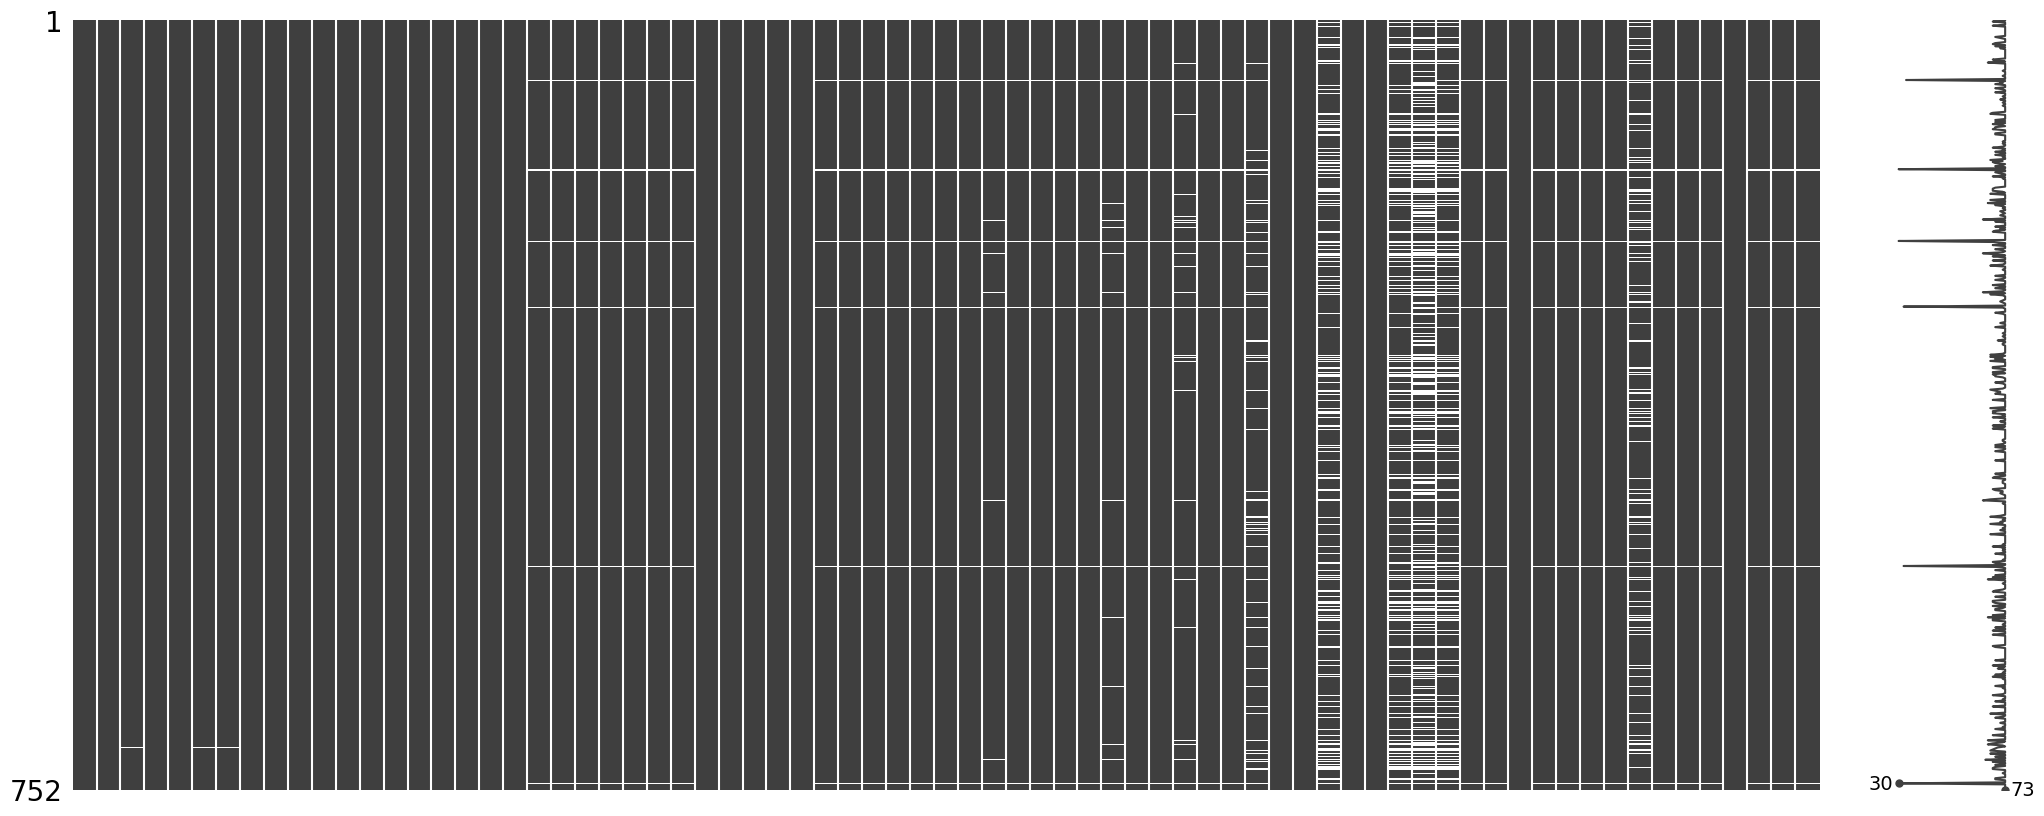

In [16]:
# Usando a ferramente que podemos ver uma matriz de missing values

msno.matrix(df)

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.isnull().sum()

ID                          0
Jogador                     0
Nação                       1
Pos                         0
Equipe                      0
Idade                       1
Nascimento                  1
Jogos                       0
Inícios                     0
Minutos                     0
90s                         0
Gols                        0
Assist                      0
G+A                         0
Gnormal                     0
PC                          0
PB                          0
CartaoA                     0
CartaoV                     0
xG                          6
xGnormal                    6
xG+A                        6
xGnormal+xG+A               6
PrgCarregadas               6
PrgPasses                   6
PrgPassesPrgRecebidos       6
Gols90                      0
Assis.90                    0
G+A90                       0
G-PB90                      0
G+A-PB90                    0
xG.1                        6
xAG.1                       6
xG+xAG    

In [19]:
# Como são poucas, irei dropar as que contiverem o valor NaN nestas colunas

df.dropna(subset=['Nação','Idade','Nascimento'], inplace=True)


In [20]:
# Checando as linhas com NaN, para analisarmos a olho nu

nan_rows = df[df.isna().any(axis=1)]
nan_rows.head()

,ID,Jogador,Nação,Pos,Equipe,Idade,Nascimento,Jogos,Inícios,Minutos,90s,Gols,Assist,G+A,Gnormal,PC,PB,CartaoA,CartaoV,xG,xGnormal,xG+A,xGnormal+xG+A,PrgCarregadas,PrgPasses,PrgPassesPrgRecebidos,Gols90,Assis.90,G+A90,G-PB90,G+A-PB90,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,PassesTotaisConcluidos,PassesTotaisTentados,%ConclusãoDePasses,DistTotalPasses,DistTotalProgressivos,PassesConcluidosCurto,PassesTentadosCurto,%PassesConclusaoCurto,PassesConcluidosMedio,PassesTentadosMedio,%PassesConclusaoMedio,PassesConcluidosLongo,PassesTentadosLongo,%PassesConclusaoLongo,TotalChutes,ChutesAGol,%ChutesNoGol,TotalChutes/90,TotalAcertos/90,Gols/Chutes,Gols/ChuteaGol,DistanciaChute,CobrancaFalta,BotesDefensivos,AssumiuPosse,Confrontos_1ter,Confrontos_2ter,Confrontos_3ter,Desarme,%DesarmesCertos,DesarmeErrado,ChutesBloqueados,PassesBloqueados,Cortes,Interceptacoes,Def,Erros
2,3,Adriel,br BRA,G,Grêmio,22.0,2001.0,2,2,180,2.0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,28.0,63.0,44.4,1101.0,947.0,3.0,3.0,100.0,10.0,10.0,100.0,15.0,50.0,30.0,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0,0.0
6,7,Washington Aguerre,uy URU,G,América (MG),29.0,1993.0,2,2,180,2.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,31.0,41.0,75.6,816.0,564.0,7.0,7.0,100.0,12.0,12.0,100.0,11.0,21.0,52.4,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,3.0,0.0
17,18,Alison,br BRA,LT,Santos,29.0,1993.0,5,2,136,1.5,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,51.0,63.0,81.0,670.0,180.0,31.0,36.0,86.1,12.0,15.0,80.0,3.0,5.0,60.0,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0.0,3.0,1,1.0,2.0,0.0,1.0,25.0,3.0,2.0,3.0,3,6.0,5.0,0.0
18,19,Alisson,br BRA,"LT,ZG",Atlético Mineiro,17.0,2005.0,5,0,49,0.5,0,0,0,0,0,0,1,0,0.0,0.0,0.2,0.2,3.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.03,0.33,0.35,0.03,0.35,21.0,31.0,67.7,388.0,105.0,9.0,13.0,69.2,8.0,10.0,80.0,3.0,4.0,75.0,1,0,0.0,1.84,0.0,0.0,NaN,33.9,0.0,2.0,2,0.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,0,2.0,1.0,0.0
23,24,Rodrigo Alves,br BRA,LT,Vasco da Gama,20.0,2002.0,8,4,352,3.9,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.01,0.00,0.01,83.0,107.0,77.6,1610.0,411.0,27.0,38.0,71.1,47.0,53.0,88.7,8.0,11.0,72.7,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0.0,11.0,5,7.0,4.0,0.0,6.0,42.9,8.0,0.0,1.0,3,14.0,5.0,1.0


In [21]:
#Consertar escrita da nação, deixando apenas as últimas 3 letras

df['Nação'] = df['Nação'].str[3:]

df.head()

,ID,Jogador,Nação,Pos,Equipe,Idade,Nascimento,Jogos,Inícios,Minutos,90s,Gols,Assist,G+A,Gnormal,PC,PB,CartaoA,CartaoV,xG,xGnormal,xG+A,xGnormal+xG+A,PrgCarregadas,PrgPasses,PrgPassesPrgRecebidos,Gols90,Assis.90,G+A90,G-PB90,G+A-PB90,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,PassesTotaisConcluidos,PassesTotaisTentados,%ConclusãoDePasses,DistTotalPasses,DistTotalProgressivos,PassesConcluidosCurto,PassesTentadosCurto,%PassesConclusaoCurto,PassesConcluidosMedio,PassesTentadosMedio,%PassesConclusaoMedio,PassesConcluidosLongo,PassesTentadosLongo,%PassesConclusaoLongo,TotalChutes,ChutesAGol,%ChutesNoGol,TotalChutes/90,TotalAcertos/90,Gols/Chutes,Gols/ChuteaGol,DistanciaChute,CobrancaFalta,BotesDefensivos,AssumiuPosse,Confrontos_1ter,Confrontos_2ter,Confrontos_3ter,Desarme,%DesarmesCertos,DesarmeErrado,ChutesBloqueados,PassesBloqueados,Cortes,Interceptacoes,Def,Erros
0,1,Nicolás Acevedo,URU,LT,Bahia,23.0,1999.0,31,21,"1,970",21.9,0,0,0,0,0,0,7,1,0.9,0.9,1.2,2.1,29.0,112.0,36.0,0.00,0.00,0.00,0.00,0.00,0.04,0.05,0.10,0.04,0.10,1029.0,1237.0,83.2,17288.0,5431.0,492.0,543.0,90.6,424.0,499.0,85.0,82.0,118.0,69.5,23,4,17.4,1.05,0.18,0.00,0.00,25.3,0.0,73.0,46,24.0,43.0,6.0,40.0,47.1,45.0,1.0,30.0,26,99.0,22.0,1.0
1,2,Luiz Adriano,BRA,AT,Internacional,35.0,1987.0,29,17,"1,330",14.8,3,1,4,3,0,0,1,1,2.6,2.6,1.3,3.9,3.0,23.0,49.0,0.20,0.07,0.27,0.20,0.27,0.18,0.09,0.27,0.18,0.27,208.0,253.0,82.2,2628.0,429.0,128.0,147.0,87.1,58.0,66.0,87.9,6.0,8.0,75.0,24,11,45.8,1.62,0.74,0.13,0.27,14.4,0.0,12.0,7,0.0,6.0,6.0,2.0,28.6,5.0,2.0,7.0,9,21.0,18.0,0.0
2,3,Adriel,BRA,G,Grêmio,22.0,2001.0,2,2,180,2.0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.0,63.0,44.4,1101.0,947.0,3.0,3.0,100.0,10.0,10.0,100.0,15.0,50.0,30.0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0,0.0
3,4,Adryelson,BRA,ZG,Botafogo (RJ),24.0,1998.0,35,35,"2,996",33.3,1,1,2,1,0,0,6,1,1.1,1.1,0.3,1.4,2.0,56.0,3.0,0.03,0.03,0.06,0.03,0.06,0.03,0.01,0.04,0.03,0.04,1303.0,1523.0,85.6,25681.0,9401.0,416.0,468.0,88.9,728.0,819.0,88.9,148.0,211.0,70.1,12,5,41.7,0.36,0.15,0.08,0.20,9.9,0.0,34.0,20,23.0,10.0,1.0,17.0,65.4,9.0,30.0,13.0,61,95.0,202.0,2.0
4,5,Adson,BRA,"AT,LT",Corinthians,22.0,2000.0,15,9,857,9.5,0,1,1,0,0,0,0,0,0.4,0.4,1.0,1.4,49.0,53.0,68.0,0.00,0.11,0.11,0.00,0.11,0.04,0.11,0.15,0.04,0.15,315.0,389.0,81.0,4735.0,1211.0,185.0,209.0,88.5,94.0,123.0,76.4,21.0,32.0,65.6,10,3,30.0,1.05,0.32,0.00,0.00,24.1,0.0,33.0,26,22.0,8.0,3.0,12.0,57.1,9.0,2.0,14.0,8,41.0,1.0,0.0


In [22]:
# Preencher com 0 o resto das colunas pois estão em branco e NaN devido a ser 0 ou dividido por 0.

df.fillna(0, inplace=True)

<Axes: >

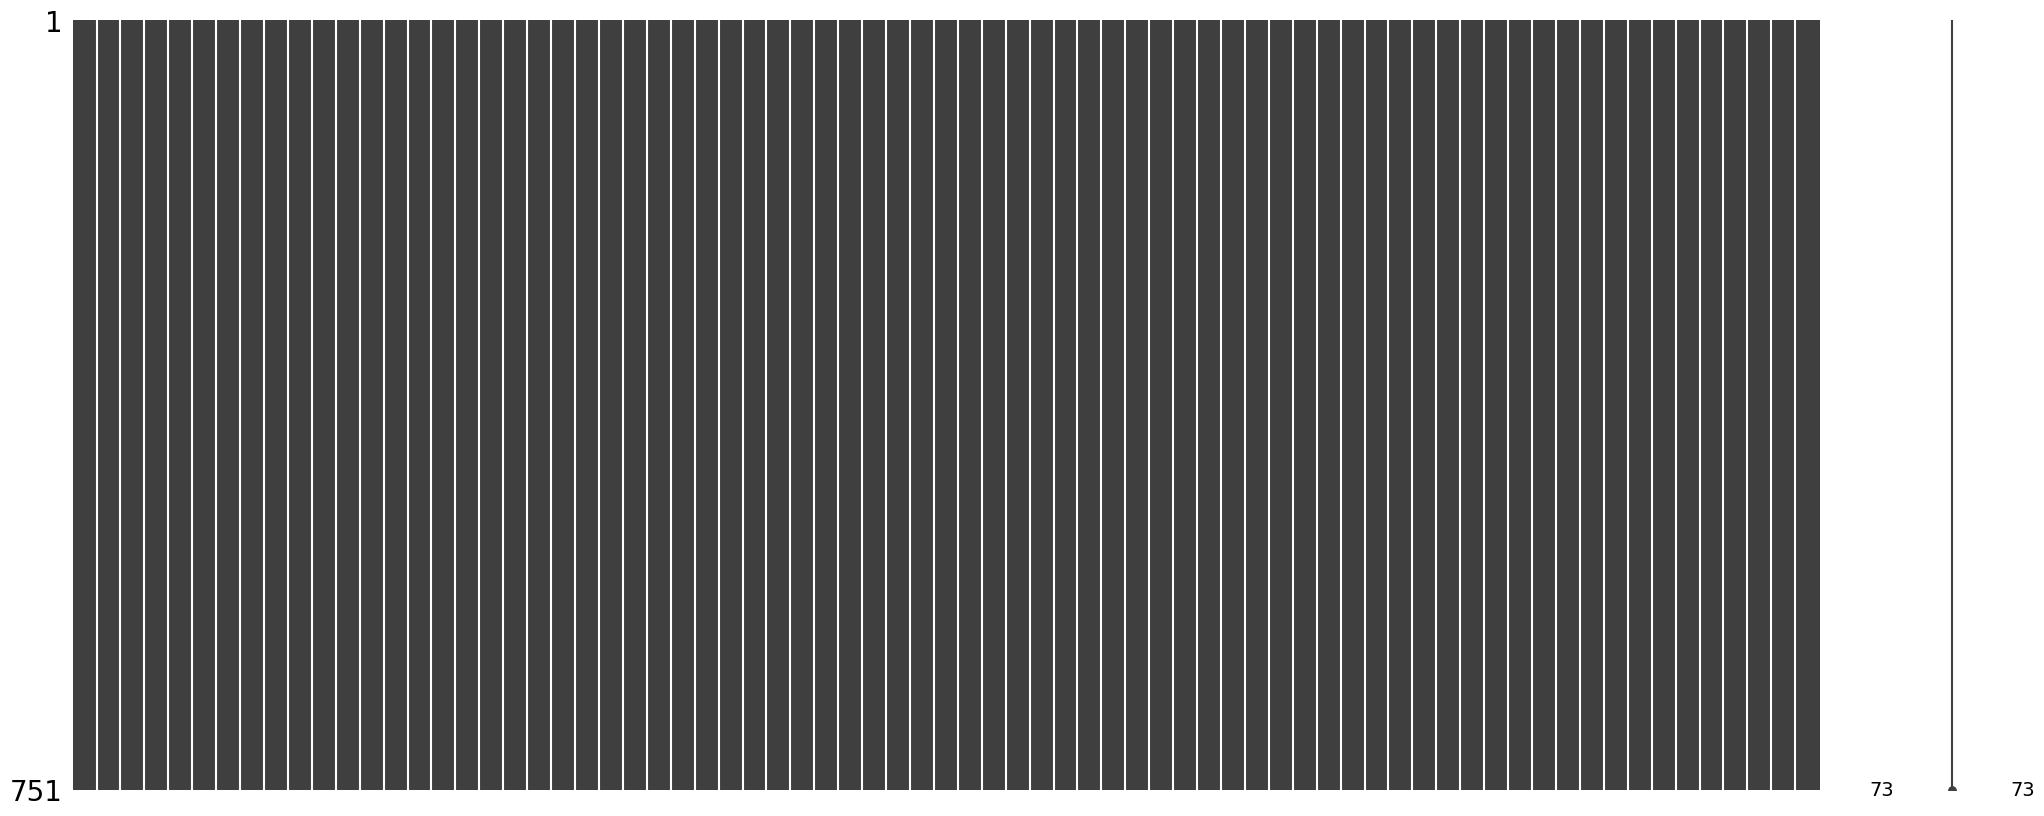

In [23]:
# Revendo a matriz de missing values

msno.matrix(df)

In [25]:
# Removendo o caractere ',' com o caractere '.',  e logo em seguida convertendo em float para melhor manuseamento dos dados

df['Minutos'] = df['Minutos'].str.replace(',','').astype(float)

In [26]:
# Transformando as colunas int em float para podermos manusear melhor os dados

colunas_int = ['Jogos', 'Inícios', 'Gols','Assist', 'G+A', 'Gnormal', 'TotalChutes','PC',
       'PB', 'CartaoA', 'CartaoV', 'ChutesAGol', 'AssumiuPosse', 'Cortes']           

df[colunas_int] =  df[colunas_int].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 751
Data columns (total 73 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      751 non-null    int64  
 1   Jogador                 751 non-null    object 
 2   Nação                   751 non-null    object 
 3   Pos                     751 non-null    object 
 4   Equipe                  751 non-null    object 
 5   Idade                   751 non-null    float64
 6   Nascimento              751 non-null    float64
 7   Jogos                   751 non-null    float64
 8   Inícios                 751 non-null    float64
 9   Minutos                 751 non-null    float64
 10  90s                     751 non-null    float64
 11  Gols                    751 non-null    float64
 12  Assist                  751 non-null    float64
 13  G+A                     751 non-null    float64
 14  Gnormal                 751 non-null    float64

In [28]:
# Mudando nome das posições

df['Pos'] = df['Pos'].apply(lambda x: 'Atacante' if 'AT' in x else x)
df['Pos'] = df['Pos'].apply(lambda x: 'Meio-Campista' if 'LT' in x else x)
df['Pos'] = df['Pos'].apply(lambda x: 'Defensor' if 'ZG' in x else x)
df['Pos'] = df['Pos'].apply(lambda x: 'Goleiro' if 'G' in x else x)


# Salvando DF's reduzidos diferenciando as posições

goleiros = df[df['Pos']=='Goleiro'] 
defensores = df[df['Pos']=='Defensor']
meiocampistas = df[df['Pos']=='Meio-Campista'] 
atacantes = df[df['Pos']=='Atacante']

In [29]:
df.to_csv('DadosLimpos/DadosTratados.csv', index=False)
goleiros.to_csv('DadosLimpos/Goleiros.csv', index=False)
defensores.to_csv('DadosLimpos/Defensores.csv', index=False)
meiocampistas.to_csv('DadosLimpos/MeioCampistas.csv', index=False)
atacantes.to_csv('DadosLimpos/Atacantes.csv', index=False)

# Finalizado o tratamento dos dados! 
* Ou seja, a partir das bases de dados iniciais conseguimos extrair 5 novos DF's que trabalharemos com.